# **Country Economic Factors for Geographic Clustering Case Study**

**Context**

The study of socio-economic factors is foundational to understanding and shaping the future of
societies and hence of extreme interest to various government and non-government institutions.
While GDP is one of the important measures used in one of the popular economic vernacular, it
is not the only measure of the growth and the state of an economy. This case study aims to deep
dive into one such dataset that contains various socio-economic attributes for countries around
the world.

**Objective**
To identify if there exist various clusters of countries that are more similar to each other than
others, in terms of certain socio-economic factors using KMeans, Hierarchical Clustering and
DBSCAN algorithms.

**Data Dictionary**
The data has the following attributes:
1. country: Name of the country
2. child_mort: Death of children under 5 years of age per 1000 live births
3. exports - Exports in % of the GDP per capita
4. health - The total spend on health given as % of GDP
5. imports - The value of imports given as % of GDP per capita
6. income - The net income per person
7. inflation - Inflation rate %
8. life_expec - Average life expectancy in years
9. total_fer - The fertility rate - Average children per woman in the country
10. gdpp - GDP per capita

# **Data Loading and Pre-Processing**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Predictive Analysis/Practical9/Copy of Country-data.csv')
# returns the first 5 rows
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# **Exploratory Data Analysis (EDA)**

In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [10]:
print(df.describe())

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

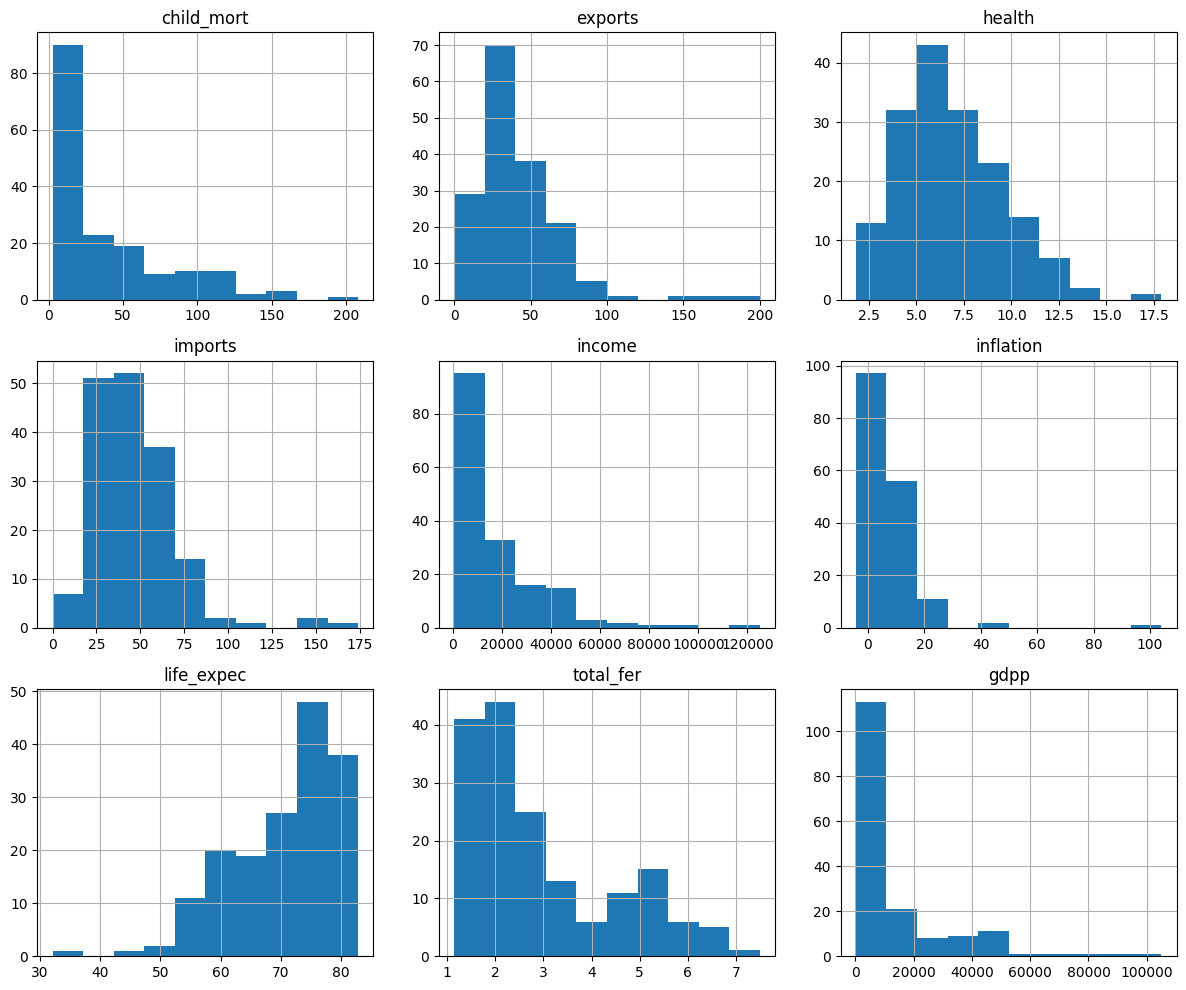

In [11]:
numerical_cols = df.columns[1:]  # Exclude 'country'
df[numerical_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

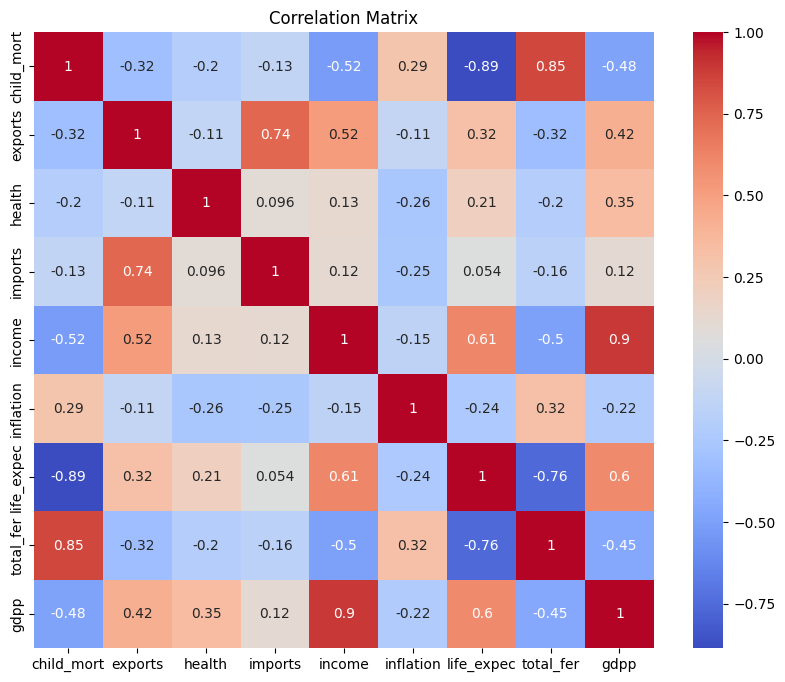

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Data Preprocessing**

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

# **K-Means Clustering**

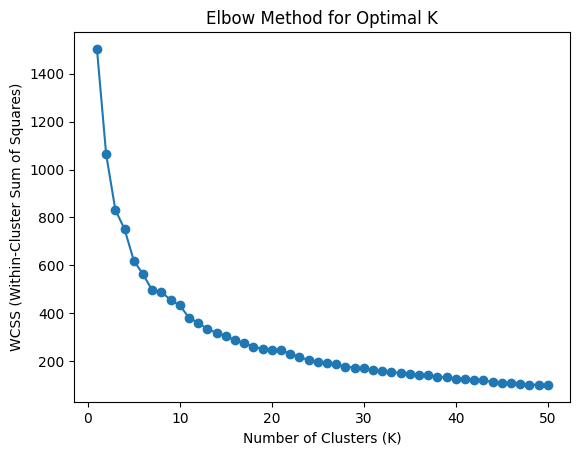

In [24]:
wcss = []
for k in range(1, 51):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 51), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()

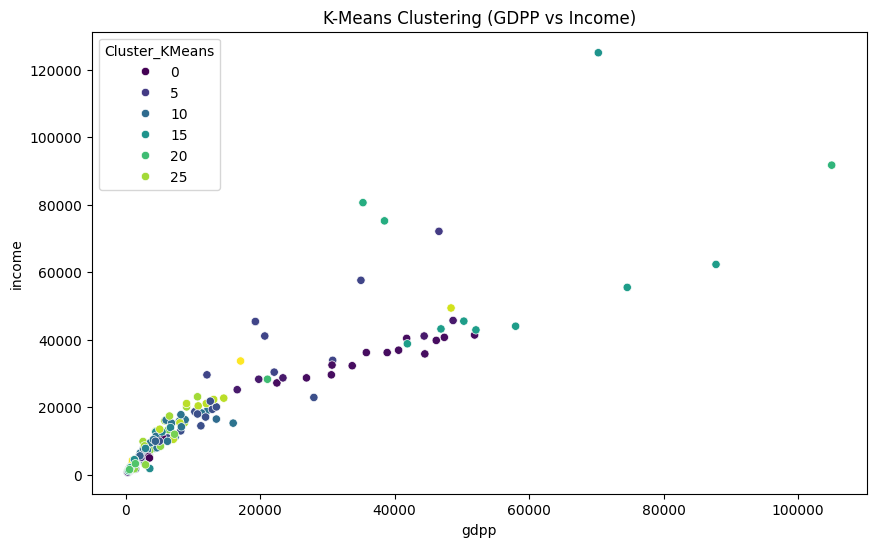

In [25]:
kmeans = KMeans(n_clusters=30, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster_KMeans'] = clusters_kmeans

# Visualize clusters using two most important features (e.g., gdpp vs income)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='income', hue='Cluster_KMeans', palette='viridis')
plt.title('K-Means Clustering (GDPP vs Income)')
plt.show()

# ** Hierarchical Clustering**

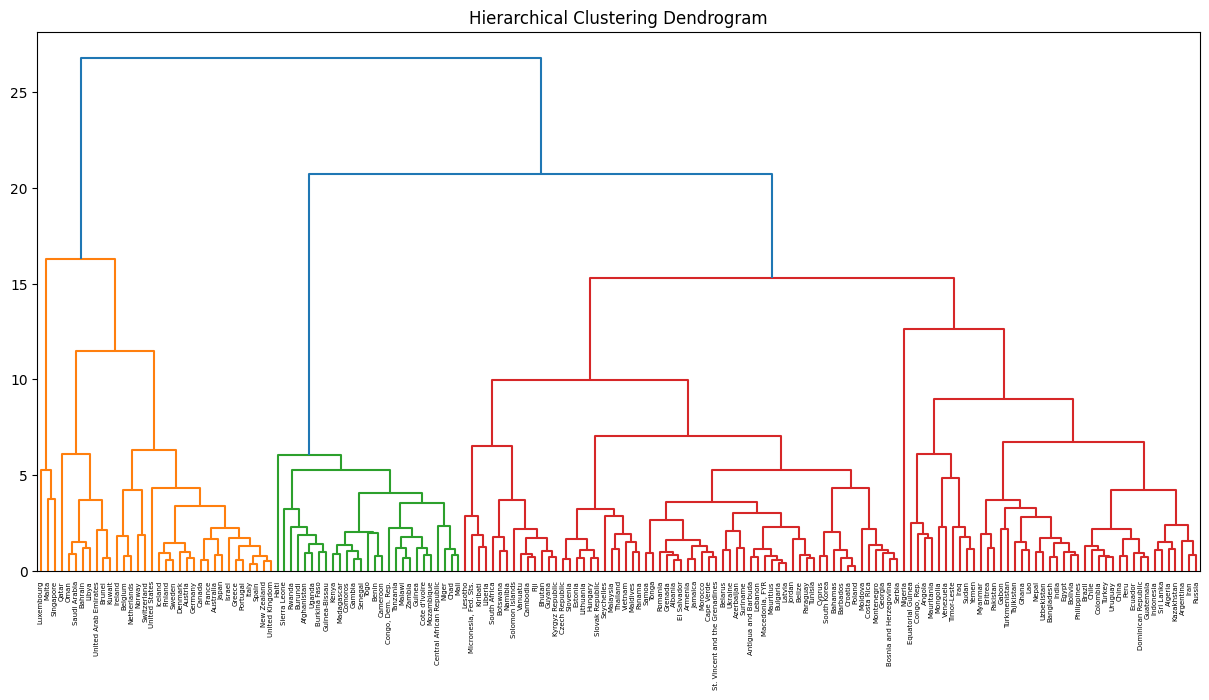

In [26]:
plt.figure(figsize=(15, 7))
dendrogram(linkage(X_scaled, method='ward'),
           labels=df['country'].values,
           leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


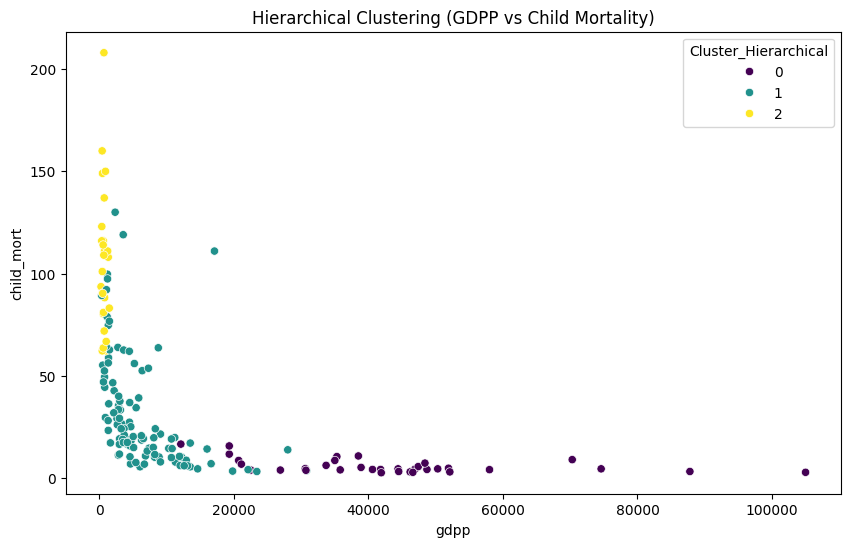

In [36]:
# Applying Agglomerative Clustering with linkage 'ward' (no affinity parameter needed)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')  # No need for affinity
clusters_hier = hierarchical.fit_predict(X_scaled)

# Assuming `df` is your DataFrame, add the cluster labels
df['Cluster_Hierarchical'] = clusters_hier

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='gdpp', y='child_mort', hue='Cluster_Hierarchical', palette='viridis')
plt.title('Hierarchical Clustering (GDPP vs Child Mortality)')
plt.show()


# **DBSCAN Clustering**

DBSCAN Clusters:  0    137
-1     30
Name: count, dtype: int64


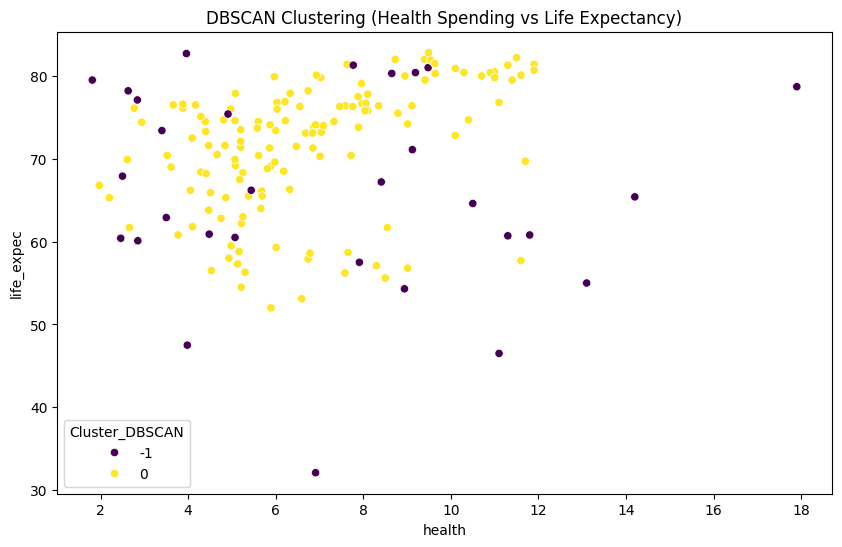

In [37]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(X_scaled)
df['Cluster_DBSCAN'] = clusters_dbscan

# Check cluster counts (-1 = noise)
print("DBSCAN Clusters:", pd.Series(clusters_dbscan).value_counts())

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='health', y='life_expec', hue='Cluster_DBSCAN', palette='viridis')
plt.title('DBSCAN Clustering (Health Spending vs Life Expectancy)')
plt.show()

# **Cluster Analysis**

In [38]:
print("\nK-Means Cluster Counts:")
print(df['Cluster_KMeans'].value_counts())

print("\nHierarchical Cluster Counts:")
print(df['Cluster_Hierarchical'].value_counts())

print("\nDBSCAN Cluster Counts:")
print(df['Cluster_DBSCAN'].value_counts())


K-Means Cluster Counts:
Cluster_KMeans
11    20
7     13
1     13
25    10
3     10
9      9
26     9
21     8
16     7
6      7
24     7
17     7
0      6
13     6
14     5
2      5
8      4
22     3
28     3
23     3
18     2
10     2
12     1
29     1
19     1
20     1
4      1
15     1
5      1
27     1
Name: count, dtype: int64

Hierarchical Cluster Counts:
Cluster_Hierarchical
1    106
0     34
2     27
Name: count, dtype: int64

DBSCAN Cluster Counts:
Cluster_DBSCAN
 0    137
-1     30
Name: count, dtype: int64


In [39]:
# Analyze K-Means clusters
cluster_means = df.groupby('Cluster_KMeans').mean()
print("\nAverage Features per Cluster (K-Means):")
print(cluster_means)

# Visualize cluster characteristics
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means.T, annot=True, cmap='YlGnBu')
plt.title('Mean Feature Values per Cluster (K-Means)')
plt.show()

TypeError: agg function failed [how->mean,dtype->object]